<a href="https://colab.research.google.com/github/AftabQuant/Deep-Learning/blob/main/Multi%20Layer%20Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Customer Churn Prediction.xlsx')

In [3]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [4]:
df = df.drop(columns=['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity'], axis = 1)

In [5]:
df.head(2)

,gender,tenure,PhoneService,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,34,Yes,DSL,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [6]:
print(df.isnull().sum())

gender               0
tenure               0
PhoneService         0
InternetService      0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [8]:
print(df.isnull().sum().sum())

0


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [10]:
df.head(2)

,gender,tenure,PhoneService,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,34,1,0,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [11]:
x = df.iloc[:, :-1]
y = df['Churn']

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x = ss.fit_transform(x)

In [13]:
x = pd.DataFrame(x)

In [14]:
x.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.009559,-1.277445,-3.054010,-1.183234,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,0.990532,0.066327,0.327438,-1.183234,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,0.990532,-1.236724,0.327438,-1.183234,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399


In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7043 non-null   float64
 1   1       7043 non-null   float64
 2   2       7043 non-null   float64
 3   3       7043 non-null   float64
 4   4       7043 non-null   float64
 5   5       7043 non-null   float64
 6   6       7043 non-null   float64
 7   7       7043 non-null   float64
 8   8       7043 non-null   float64
 9   9       7043 non-null   float64
 10  10      7043 non-null   float64
 11  11      7043 non-null   float64
 12  12      7043 non-null   float64
 13  13      7043 non-null   float64
dtypes: float64(14)
memory usage: 770.5 KB


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Single Layer Perceptron**

In [17]:
from sklearn.linear_model import Perceptron

pr = Perceptron()
pr.fit(x_train, y_train)

Perceptron()

In [18]:
print(pr.score(x_train, y_train)*100)
print(pr.score(x_test, y_test)*100)

69.13383031593894
69.90773598296664


## **Multi Layer Perceptron**

In [19]:
import tensorflow as tf

In [20]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [21]:
ann = Sequential()

In [22]:
ann.add(Dense(10, input_dim = 14, activation = 'relu'))
ann.add(Dense(7, activation = 'relu'))
ann.add(Dense(4, activation = 'relu'))
ann.add(Dense(2, activation = 'relu'))
ann.add(Dense(1, activation = 'sigmoid'))

In [23]:
ann.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
ann.fit(x_train, y_train, epochs = 20, batch_size=100)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8030 - loss: 0.4475
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8111 - loss: 0.4378
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8110 - loss: 0.4411
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8086 - loss: 0.4400
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8057 - loss: 0.4484
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8045 - loss: 0.4410
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8061 - loss: 0.4382
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7964 - loss: 0.4512
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8078 - loss: 0.4353
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8114 - loss: 0.4335
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8067 - loss: 0.4406
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8034 - 

In [28]:
from sklearn.metrics import accuracy_score

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(accuracy_score(y_test, y_pred)*100)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80.55358410220013


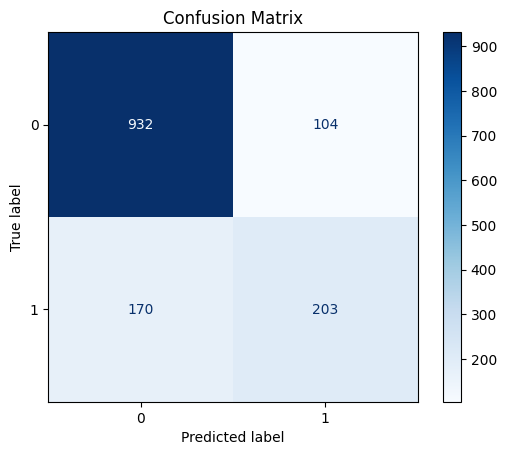

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cn = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cn)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()